In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
df_bank = pd.read_csv("Churn_Modelling.csv")
df_bank = df_bank.drop(['RowNumber', 'Surname'], axis = 1)

# 1. Descriptive Statistics

In [10]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [15]:
df_bank.sample(20)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6199,15750755,449,Spain,Female,33,8,0.00,2,0,0,156792.89,0
2890,15689616,586,Spain,Male,34,5,168094.01,1,0,0,20058.61,0
5214,15709474,740,Germany,Female,57,3,113386.36,2,1,1,65121.63,1
8697,15644551,751,Spain,Female,37,3,99773.85,2,1,0,54865.92,0
6778,15613463,679,Germany,Female,50,6,132598.38,2,1,1,184017.98,0
6389,15687607,605,France,Female,30,9,135422.31,1,0,1,186418.85,0
6112,15654372,462,Germany,Male,34,1,94682.56,2,1,0,138478.20,0
6379,15770543,679,France,Male,37,7,74260.03,1,1,0,194617.98,0
9679,15605067,472,France,Male,19,9,0.00,2,1,0,3453.40,0
2102,15802351,755,Germany,Female,33,6,90560.30,2,1,1,42607.69,0


In [12]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['NumOfProducts', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
nums = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
objk = ['Geography', 'Gender']

In [36]:
# ringkasan statistik dari kolom numerik
df_bank[nums].describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


In [37]:
df_bank[objk].describe()

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [14]:
# cek jumlah duplicated rows dari semua kolom
df_bank.duplicated().sum()

0

In [13]:
# cek jumlah duplicated rows dari kolom customer id
df_bank.duplicated('CustomerId').sum()

0

### **Interpretasi dari Descriptive Statistics**
Berdasarkan hasil deskriptif statistik diatas dapat dilihat bahwa :
1. Data terdiri dari 10000 baris dan 14 kolom, tanpa nilai null dan dapat dilihat pula bahwa isi dataset sesuai dengan nama kolomnya
2. Summary masing-masing kolom selain kolom balance juga terbilang normal. Adapun kolom balance, dapat dilihat bahwa nilai mean dan median memiliki gap yang terbilang cukup jauh yaitu sekitar 20000
3. Rata-rata usia pelanggan Bank X adalah 39 tahun (pembulatan), median usia adalah 37 tahun, dan deviasi standar usia adalah 10 tahun. Ini berarti sebagian besar usia pelanggan berada dalam kisaran 29 hingga 49 tahun dari rata-rata (39 tahun).
4. Rata-rata pendapatan pelanggan adalah 100090,  median pendapatan adalah 100193, dan deviasi standar pendapatan adalah 57510.
5. Rata-rata durasi masa langganan pelanggan adalah 5 tahun. Ini berarti  secara keseluruhan, pelanggan Bank X rata-rata mempertahankan hubungan dengan bank X selama 5 tahun.




# 2. Univariate Analysis

### Persebaran data numerikal

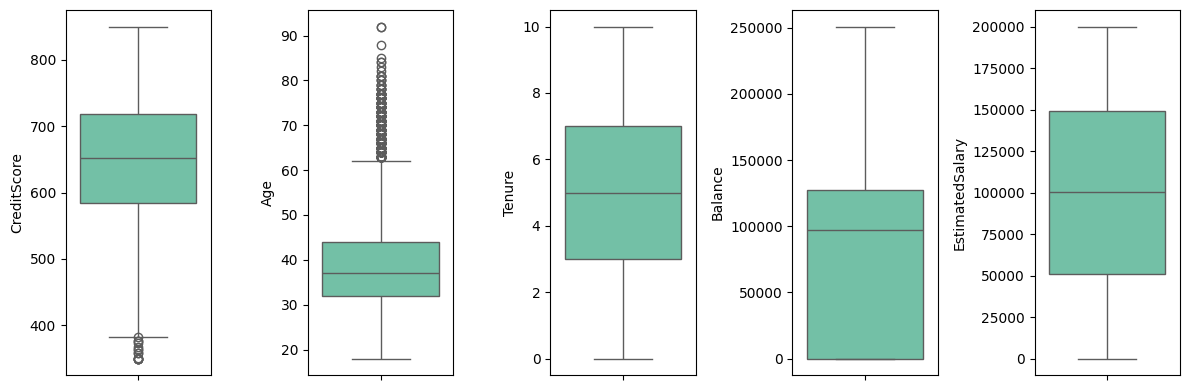

In [40]:
plt.figure(figsize=(12, 4))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df_bank[nums[i]], color='mediumaquamarine', orient='v')
    plt.tight_layout()

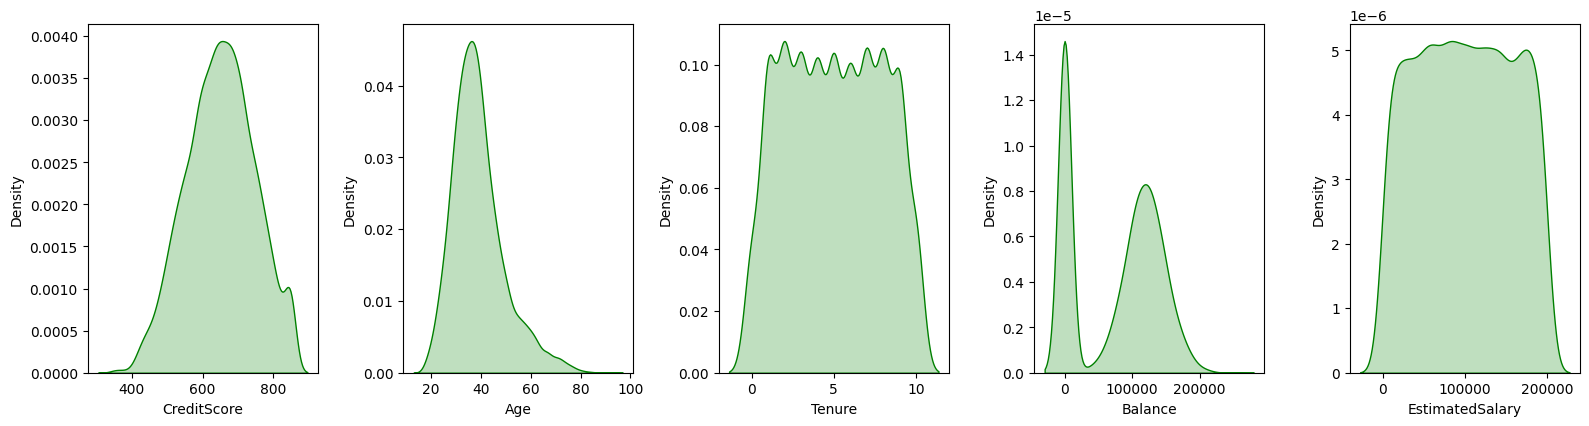

In [41]:
plt.figure(figsize=(16, 8))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums), i+1)
    sns.kdeplot(df_bank[nums[i]], color= 'Green', fill= True)
    plt.tight_layout()

### Persebaran data kategorikal

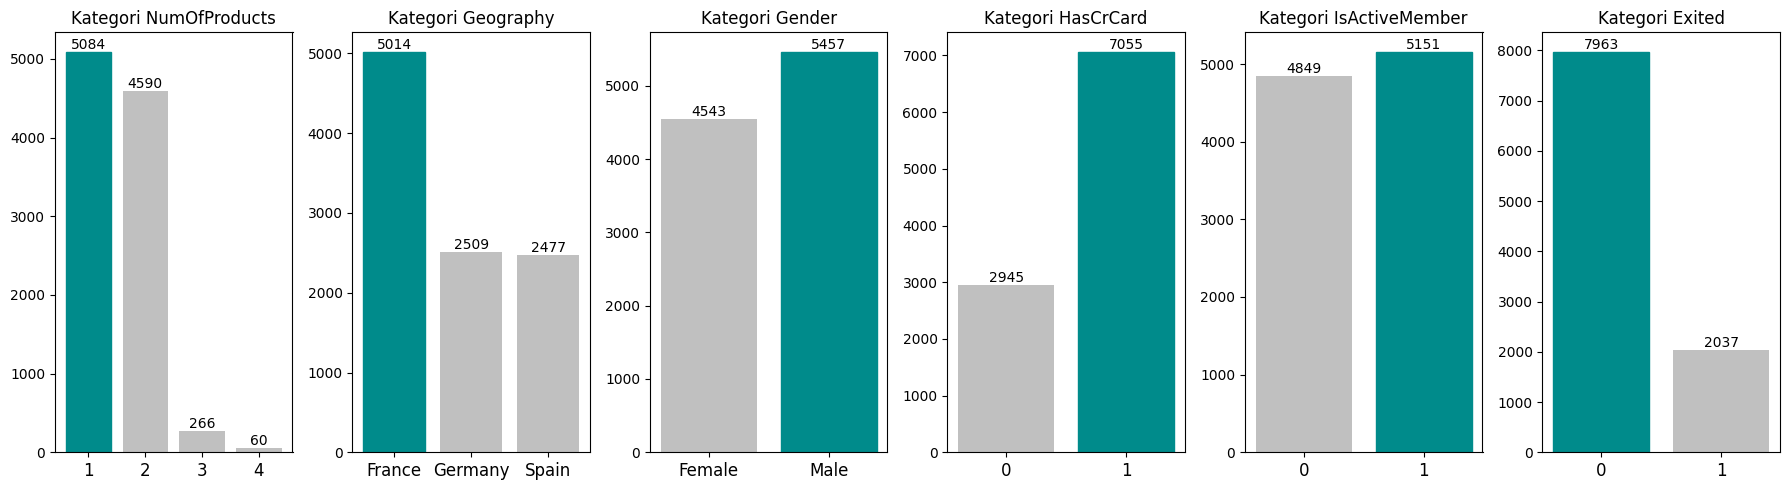

In [17]:
fig, axes = plt.subplots(1, 6, figsize=(18, 5))  # Mengatur ukuran gambar dan jumlah subplot

# loop melalui setiap kategori dalam 'cats' dan membuat bar plot terpisah dalam subplot
for i, cat in enumerate(cats):
    data = df_bank[cat]
    value_counts = data.value_counts()
    value_counts = value_counts.sort_index()
    max_value = value_counts.idxmax()
    bars = axes[i].bar(value_counts.index, value_counts.values, color='silver')
    
    # coloring bar dengan nilai tertinggi
    for bar in bars:
        if bar.get_height() == value_counts[max_value]:
            bar.set_color('darkcyan')
            
    for j, value in enumerate(value_counts.values):
        if i == 0:
            # mengatur posisi teks secara manual untuk chart pertama
            x_position = j + 1
            y_position = value
        else:
            # mengatur posisi teks selain chart pertama
            x_position = j
            y_position = value
        axes[i].text(x_position, y_position, str(value), ha='center', va='bottom')
    
    axes[i].set_title(f'Kategori {cat}')
    axes[i].set_xticks(value_counts.index)
    axes[i].set_xticklabels(value_counts.index, fontsize=12)

plt.tight_layout()
plt.show()

### **Interpretasi dari Univeriate Analysis**
1. Terdapat 2 fitur yang memiliki outlier yaitu kolom CreditScore dan kolom Age. Berdasarkan boxplot, jumlah credit score normalnya berada di angka 600-700 dan untuk jumlah kredit score dibawah 390 dikategorikan outlier sedangkan Age berada di angka 32-44 tahun dan untuk umur 62 keatas di kategorikan sebagai outlier.
2. Adapun jika dilihat dari kdeplot dapat dilihat fitur Creditscore memiliki distribusi hampir normal sedangkan kolom age memiliki distribusi positif dengan ekor yang panjang ke kanan.
3. Selain kedua fitur tersebut diatas terdapat juga fitur Tenure dan EstimatedSalary yang datanya cenderung tidak memiliki outlier dengan distribusi yang normal dan fitur balance dengan data yang cenderung tidak memiliki outlier juga dan distribusi tidak normal dengan data yang kebanyakan berkumpul di angka 0-30000 dan 50000-200000.
4. Adapun untuk persebaran data kategorikal dapat dilihat bahwa pada fitur numofproducts jumlah nasabah yang memiliki 1 atau 2 produk unggul dengan angka yang sangat signifikan di bandingkan nasabah yang memiliki 3 atau 4 produk. Pada fitur geography jumlah nasabah dari france unggul dengan jumlah 2 kali lipat dari jumlah nasabah yang ada di germany atau spain. untuk fitur gender, male dan female memiliki perbedaan yang tidak begitu signifikan dengan jumlah 4543 untuk female dan 5457 untuk male. untuk fitur hascrcard  sekitar 70 persen dari nasabah diketahui memiliki credit card. untuk fitur isactivemember keduanya memiliki jumlah yang hampir sama dimana member dengan isactive yang nilainya true unggul sebanyak 302 nasabah di banding yg nilainya false.
5. Untuk label, label disini memiliki ketimpangan presentase yang sangat signifikan dimana presentase jumlah nasabah yang churn adalah sebanyak 20,3% sedangkan presentase churn yang normal pada umumnya adalah 5-7%.

### yang harus di follow up saat data pre-processing:
1. Melakukan label encoding untuk feature categorical Gender menjadi 0 (male) dan 1(female)
2. ‌Melakukan one-hot encoding untuk feature categorical Geography menjadi numerik dengan menjadikan masing-masing nilai unik feature tersendiri
3. ‌Karna distribusi Age positive skewed, maka dilakukan log transformation pada kolom Age
4. ‌Melakukan normalisasi pada EstimatedSalary karna dengan skala yang sama dan centered akan memepercepat algoritma pembelajaran (model training)
5. ‌menghapus outlier pada CreditScore dan Balence
6. ‌drop CustomerId karna fitur tidak dibutuhkan
7. ‌melakukan resampling HasCrCard dan Exited

# 3. Multivariate Analysis

In [62]:
nums2 = ['CreditScore',	'Age',	'Tenure',	'Balance',	'NumOfProducts',	'HasCrCard',	'IsActiveMember',	'EstimatedSalary',	'Exited']

<Axes: >

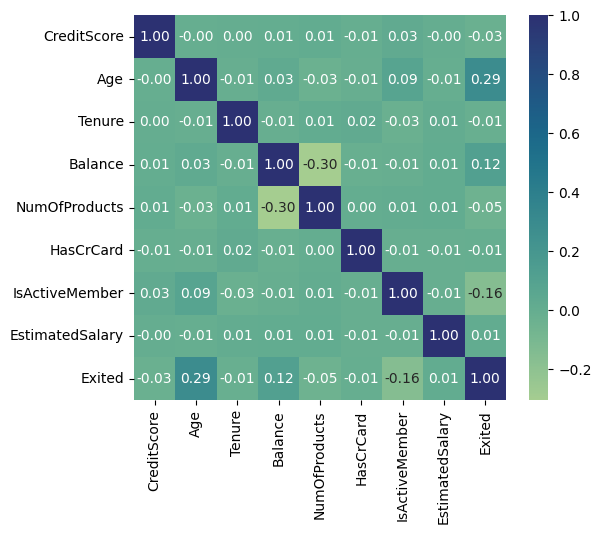

In [63]:
plt.figure(figsize=(6, 5))
sns.heatmap(df_bank[nums2].corr(), cmap='crest', annot=True, fmt='.2f')

### **Interpretasi dari Multivariate Analysis**
1. Terdapat 2 fitur yang memiliki korelasi positif dengan label yaitu fitur balance dengan score 0.12 dan fitur Age dengan score 0.29. untuk itu, kedua fitur ini dapat dipertimbangkan untuk dipertahankan karena dibanding fitur lainnya kedua fitur ini dianggap paling relevan.
2. Adapun terkait korelasi antar fitur, terdapat 2 fitur yang memiliki korelasi negatif yaitu numofproducts dan balance dengan score sebesar -0.30. Karena korelasi antar fitur dapat mempengaruhi model maka dalam hal ini, kedua fitur harus menjalani uji mulkolinearitas untuk menentukan fitur mana yang lebih baik dipertahankan dan mana yang harus di hapus.

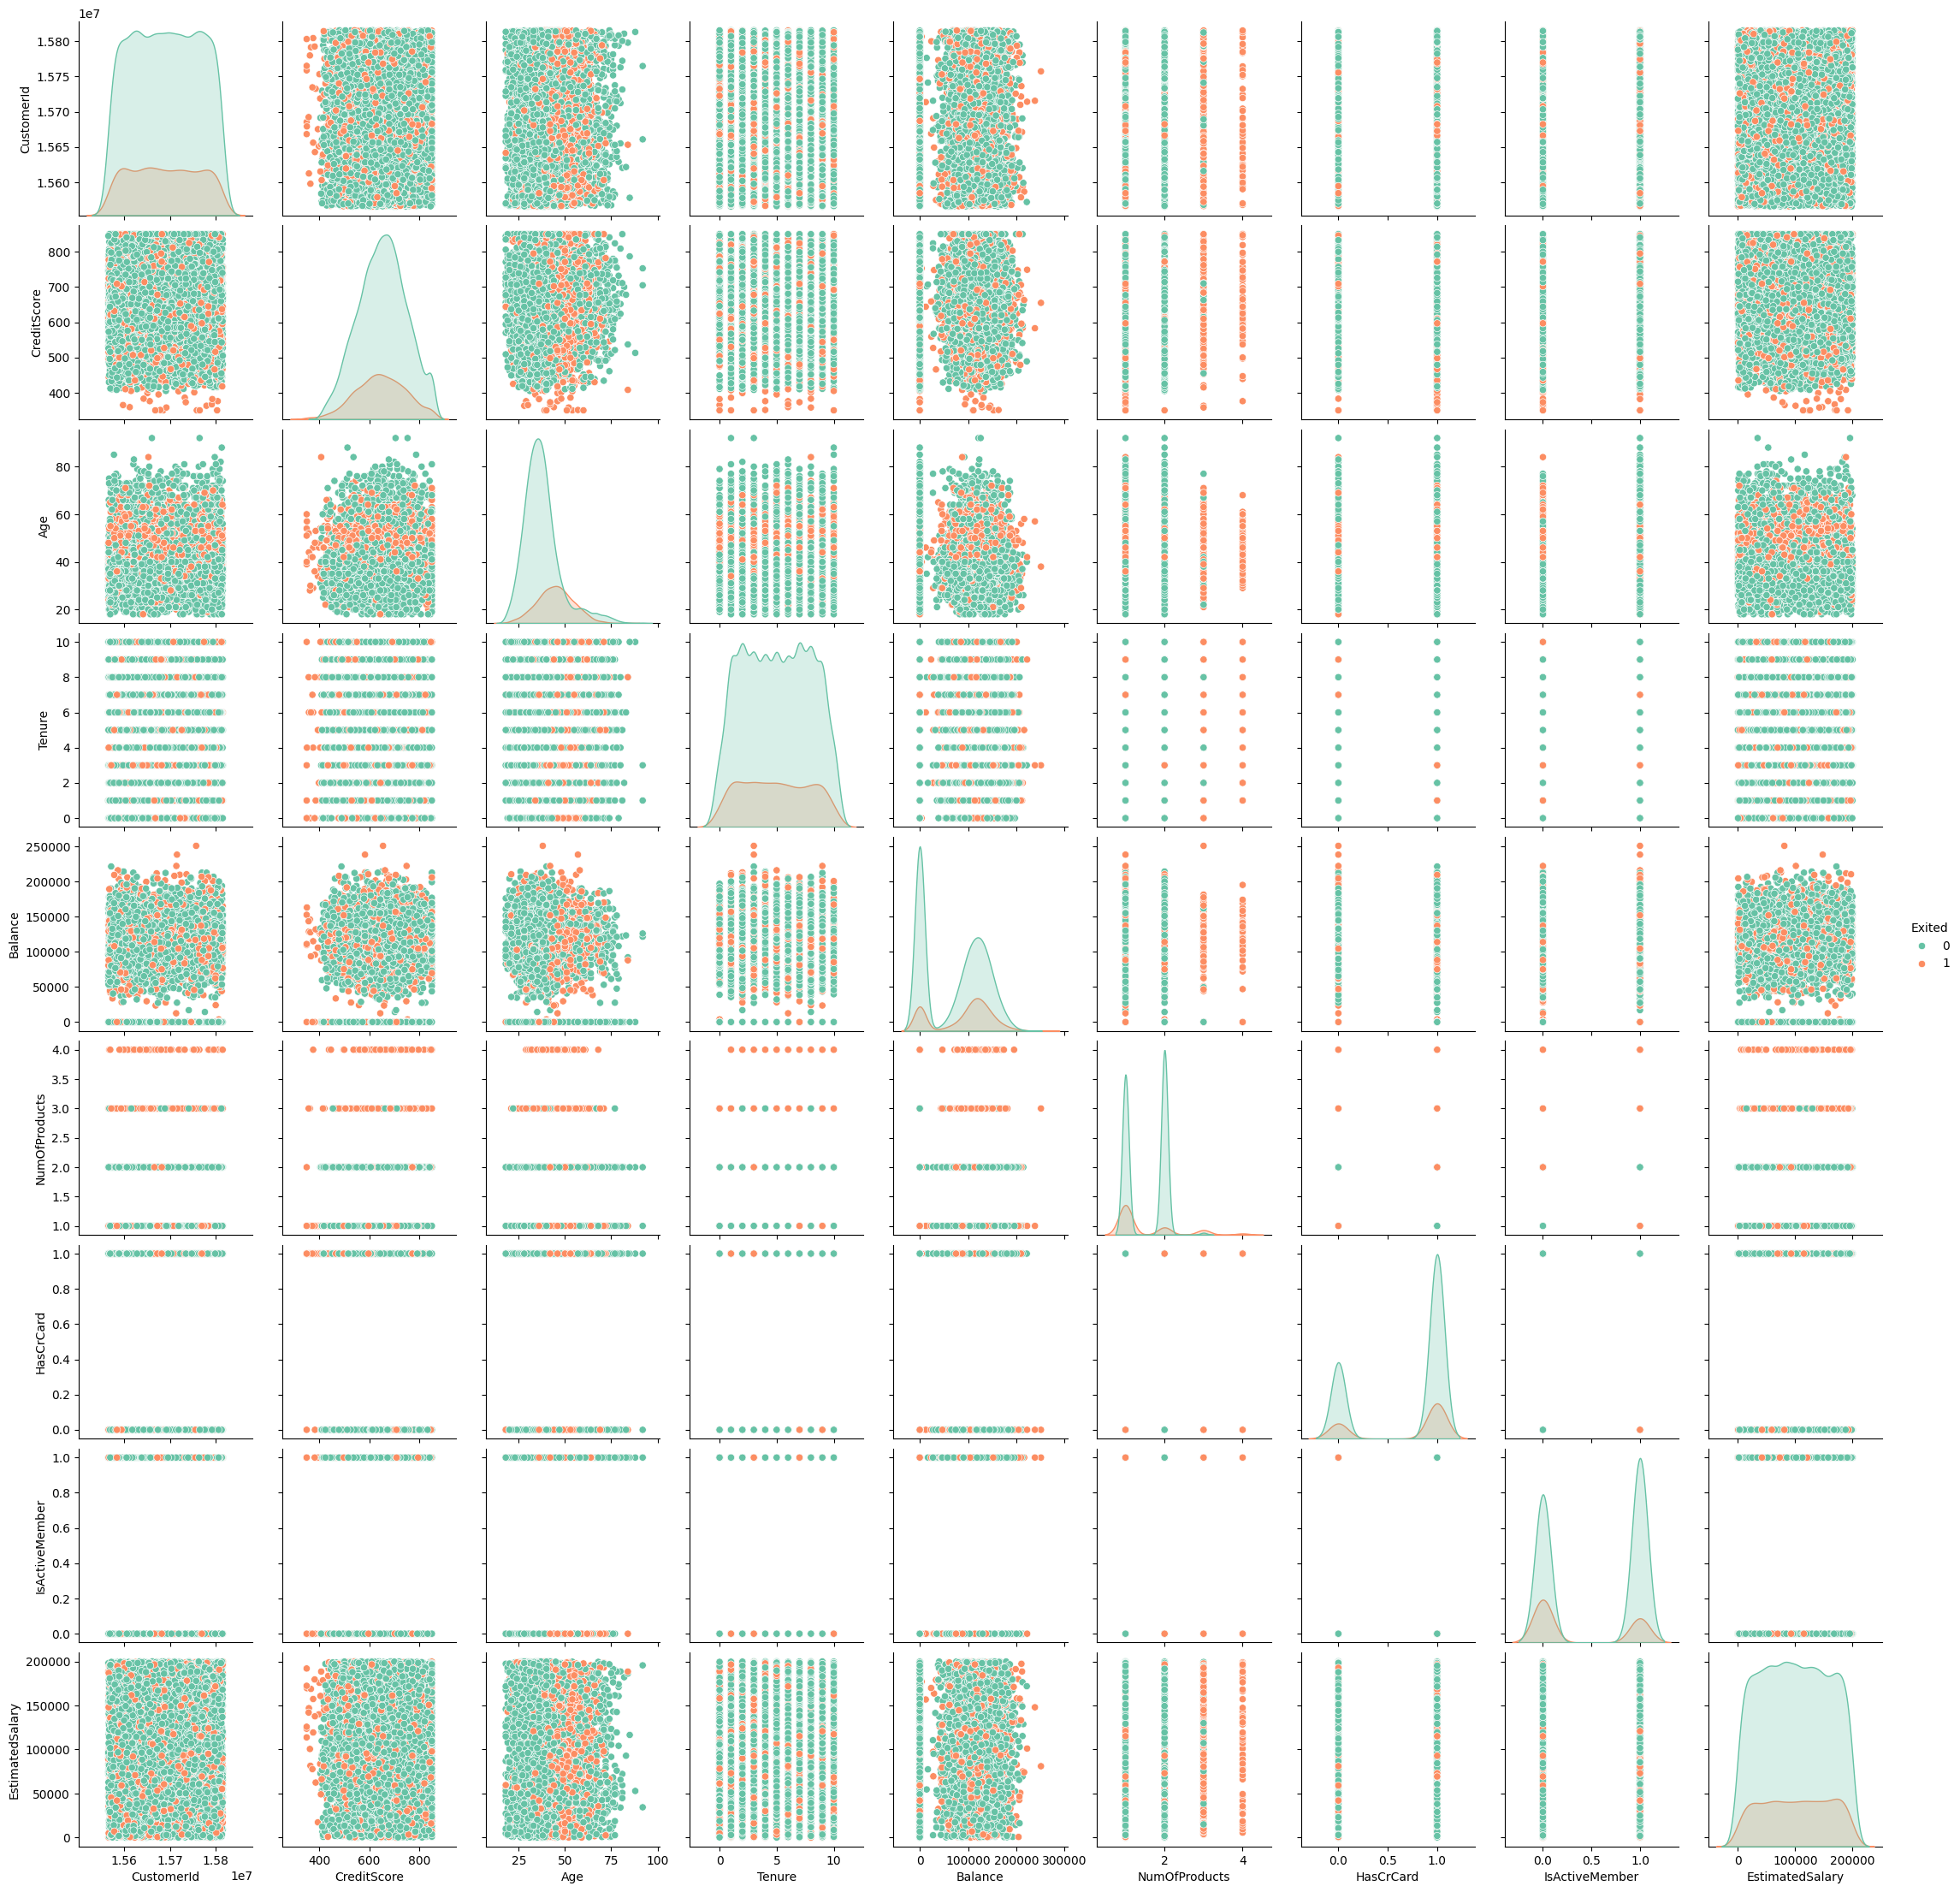

In [38]:
sns.pairplot(df_bank, diag_kind = 'kde', hue = 'Exited', palette='Set2')

1. Berdasarkan visualisasi diatas kita bisa lihat terdapat korelasi antara creditscore dan age terhadap exited, dari scatter plotnya kita mengetahui nasabah yang memiliki creditscore dibawah 400 dan berumur diantara 35-60an memiliki kencederungan untuk churn. 
2. kita juga dapat melihat terdapat pola menarik pada number of product, dimana nasabah yang mengambil lebih dari 2 produk lebih cenderung untuk churn.

# 4. Business Insight 

1. Korelasi Antara Fitur Numerik: 
Dari analisis multivariat dan pairplot dapat dilihat bahwa korelasi antara beberapa fitur numerik seperti 'Age' dan 'Exited', diketahui bahwa pelanggan berusia diatas 50 tahun memiliki kecenderungan churn. Dalam hal ini Bank X perlu memperhatikan pelanggan dengan usia diatas 50 (Age) dan memahami mengapa mereka lebih cenderung untuk berhenti berlangganan (Exited). Ini dapat melibatkan peningkatan pelayanan atau promosi yang lebih sesuai dengan kelompok usia tersebut.
2. Distribusi Pelanggan Berdasarkan Lokasi (Geography):
Setelah melakukan analisis univariat, kita melihat distribusi pelanggan berdasarkan lokasi geografis mereka. Pihak Bank perlu mempertimbangkan strategi pemasaran dan layanan yang lebih spesifik berdasarkan lokasi pelanggan. Hal ini bisa mencakup kampanye pemasaran yang disesuaikan dengan preferensi atau kebutuhan pelanggan di tiap-tiap daerah.
3. Berdasarkan visualisasi heatmap dari multivariate analysis jika kita lihat dari korelasi, balance dan label memiliki korelasi positif yang berarti semakin tinggi balance maka nasabah semakin cenderung churn, ini dapat menandakan bahwa ada kemungkinan bahwa nasabah dengan balance yang tinggi ini merasa kurang puas terhadap pelayanan, dan memutuskan untuk churn. Maka bank perlu melakukan peningkatan pelayanan untuk mempertahankan nasabah yang balancenya tinggi begitu juga dengan age.
4. Berdasarkan NumOfProducts, bahwa data visualisasi menunjukkan sekitar 5.084 hanya menggunakan 1 layanan produk bank X dan berdasarkan pairplot distribusi tingkat churn berdasarkan NumOfProducts semakin banyak jumlah produk maka semakin besar pula potensi churn pada nasabah. Oleh karena itu bank X harus melakukan pengecekan kembali terkait kualitas produk sebelum melakukan pemasaran.
5. Berdasarkan HsCrCard, bahwa data visualisasi menunjukkan ternyata sekitar 7055 nasabah menggunakan layanan kartu kredit Bank X, ini merupakan suatu hal yang positif. Namun akan leih baiknya Bank X meningkatkan jumlah penggunaan kartu kredit atau paling tidak mempertahankan penggunaan kartu kredit tersebut. Dari sini Bank X dapat memberikan penawaran khusus untuk pelanggan yang belum menggunakan kartu kredit dan memberikan reward untuk pelanggan yang sudah lama menggunankan kartu kredit.